In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# --- Load and subset columns ---
df = pd.read_csv("../datasets/Tanikon_2023-25.csv")

/tmp/ipykernel_1193029/2124603138.py:2: DtypeWarning: Columns (448,477,504,531,560,620,621,741) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../datasets/Tanikon_2023-25.csv")


In [4]:
df.head(5)

,TIMESTAMP_MIDDLE,AIR_CP,AIR_DENSITY,AIR_MV,AIR_RHO_CP,AOA_METHOD,AXES_ROTATION_METHOD,BADM_HEIGHTC,BADM_INSTPAIR_EASTWARD_SEP_GA_CH4,BADM_INSTPAIR_EASTWARD_SEP_GA_CO2,BADM_INSTPAIR_EASTWARD_SEP_GA_H2O,BADM_INSTPAIR_EASTWARD_SEP_GA_N2O,BADM_INSTPAIR_HEIGHT_SEP_GA_CH4,BADM_INSTPAIR_HEIGHT_SEP_GA_CO2,BADM_INSTPAIR_HEIGHT_SEP_GA_H2O,BADM_INSTPAIR_HEIGHT_SEP_GA_N2O,BADM_INSTPAIR_NORTHWARD_SEP_GA_CH4,BADM_INSTPAIR_NORTHWARD_SEP_GA_CO2,BADM_INSTPAIR_NORTHWARD_SEP_GA_H2O,BADM_INSTPAIR_NORTHWARD_SEP_GA_N2O,BADM_INST_AVERAGING_INT,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_CH4,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_CO2,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_H2O,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_N2O,BADM_INST_GA_CP_TUBE_IN_DIAM_GA_CH4,BADM_INST_GA_CP_TUBE_IN_DIAM_GA_CO2,BADM_INST_GA_CP_TUBE_IN_DIAM_GA_H2O,BADM_INST_GA_CP_TUBE_IN_DIAM_GA_N2O,BADM_INST_GA_CP_TUBE_LENGTH_GA_CH4,BADM_INST_GA_CP_TUBE_LENGTH_GA_CO2,BADM_INST_GA_CP_TUBE_LENGTH_GA_H2O,BADM_INST_GA_CP_TUBE_LENGTH_GA_N2O,BADM_INST_HEIGHT_SA,BADM_INST_SAMPLING_INT,BADM_LOCATION_ELEV,BADM_LOCATION_LAT,BADM_LOCATION_LONG,BADM_SA_OFFSET_NORTH,BOWEN,BURBA_METHOD,CH4,CH4_ABSLIM_NREX,CH4_DIAG_NREX,CH4_KID,CH4_LGD,CH4_MEAS_KUR,CH4_MEAS_MEDIAN,CH4_MEAS_N2O_MEAS_COV,CH4_MEAS_P25,CH4_MEAS_P75,CH4_MEAS_SIGMA,CH4_MEAS_SKW,CH4_MEAS_TYPE,CH4_MIXING_RATIO,CH4_MOLAR_DENSITY,CH4_NR,CH4_NUM_SPIKES,CH4_SPIKE_NREX,CH4_TLAG_ACTUAL,CH4_TLAG_MAX,CH4_TLAG_MIN,CH4_TLAG_NOMINAL,CH4_TLAG_USED,CH4_VM97_TEST,CH4_ZCD,CO2,CO2_ABSLIM_NREX,CO2_DIAG_NREX,CO2_KID,CO2_LGD,CO2_MEAS_H2O_MEAS_COV,CO2_MEAS_KUR,CO2_MEAS_MEDIAN,CO2_MEAS_P25,CO2_MEAS_P75,CO2_MEAS_SIGMA,CO2_MEAS_SKW,CO2_MEAS_TYPE,CO2_MIXING_RATIO,CO2_MOLAR_DENSITY,CO2_NR,CO2_NUM_SPIKES,CO2_SPIKE_NREX,CO2_TLAG_ACTUAL,CO2_TLAG_MAX,CO2_TLAG_MIN,CO2_TLAG_NOMINAL,CO2_TLAG_USED,CO2_VM97_TEST,CO2_ZCD,CUSTOM_AIR_P_MEAN,CUSTOM_CH4_MEAN,CUSTOM_CO2_MEAN,CUSTOM_COOLER_V_MEAN,CUSTOM_DATA_SIZE_IRGA72_MEAN,CUSTOM_DATA_SIZE_LGR_MEAN,CUSTOM_FILTER_NR,CUSTOM_FILTER_NREX,CUSTOM_FIT_FLAG_MEAN,CUSTOM_FLOWRATE_MEAN,CUSTOM_GA_DIAG_CODE_IRGA72_MEAN,CUSTOM_H2O_MEAN,CUSTOM_MIRROR_RINGDOWNTIME_MEAN,CUSTOM_N2O_MEAN,CUSTOM_SIGNAL_STRENGTH_IRGA72_MEAN,CUSTOM_STATUS_CODE_IRGA72_MEAN,CUSTOM_STATUS_CODE_LGR_MEAN,CUSTOM_T_UNKNOWN_MEAN,DENTRENDING_TIME_CONSTANT,DETRENDING_METHOD,DISPLACEMENT_HEIGHT,DOY_END,DOY_START,DRYAIR_DENSITY,DRYAIR_MV,DRYAIR_PARTIAL_PRESSURE,ET,ET_CORRDIFF,ET_RANDUNC_HF,ET_SCF,ET_SSITC_TEST,ET_STAGE1,ET_STAGE2,ET_UNCORR,EXPECT_NR,FC,FCH4,FCH4_CORRDIFF,FCH4_NR,FCH4_NSR,FCH4_RANDUNC_HF,FCH4_SCF,FCH4_SS,FCH4_SSITC_TEST,FCH4_SS_TEST,FCH4_STAGE1,FCH4_STAGE2,FCH4_UNCORR,FCH4_VADV,FC_CORRDIFF,FC_NR,FC_NSR,FC_RANDUNC_HF,FC_SCF,FC_SS,FC_SSITC_TEST,FC_SS_TEST,FC_STAGE1,FC_STAGE2,FC_UNCORR,FC_VADV,FETCH_10,FETCH_30,FETCH_50,FETCH_70,FETCH_80,FETCH_90,FETCH_MAX,FETCH_OFFSET,FH2O,FH2O_CORRDIFF,FH2O_NSR,FH2O_RANDUNC_HF,FH2O_SCF,FH2O_SS,FH2O_SSITC_TEST,FH2O_SS_TEST,FH2O_STAGE1,FH2O_STAGE2,FH2O_UNCORR,FH2O_VADV,FILE_NR,FILE_TIME_DURATION,FN2O,FN2O_CORRDIFF,FN2O_NR,FN2O_NSR,FN2O_RANDUNC_HF,FN2O_SCF,FN2O_SS,FN2O_SSITC_TEST,FN2O_SS_TEST,FN2O_STAGE1,FN2O_STAGE2,FN2O_UNCORR,FN2O_VADV,FOOTPRINT_MODEL,H,H2O,H2O_ABSLIM_NREX,H2O_DIAG_NREX,H2O_KID,H2O_LGD,H2O_MEAS_CH4_MEAS_COV,H2O_MEAS_KUR,H2O_MEAS_MEDIAN,H2O_MEAS_N2O_MEAS_COV,H2O_MEAS_P25,H2O_MEAS_P75,H2O_MEAS_SIGMA,H2O_MEAS_SKW,H2O_MEAS_TYPE,H2O_MIXING_RATIO,H2O_MOLAR_DENSITY,H2O_NR,H2O_NUM_SPIKES,H2O_SPIKE_NREX,H2O_TLAG_ACTUAL,H2O_TLAG_MAX,H2O_TLAG_MIN,H2O_TLAG_NOMINAL,H2O_TLAG_USED,H2O_VM97_TEST,H2O_ZCD,HPATH_GA_CH4,HPATH_GA_CO2,HPATH_GA_H2O,HPATH_GA_N2O,HPATH_SA,H_CORRDIFF,H_NR,H_NSR,H_RANDUNC_HF,H_SCF,H_SS,H_SSITC_TEST,H_SS_TEST,H_STAGE1,H_STAGE2,H_UNCORR,INST_LI7200_AGC_OR_RSSI,INST_LI7500_AGC_OR_RSSI,LE,LE_CORRDIFF,LE_NR,LE_RANDUNC_HF,LE_SCF,LE_SSITC_TEST,LE_STAGE1,LE_STAGE2,LE_UNCORR,MO_LENGTH,MO_LENGTH_UNCORR,MV_AIR_CELL_CH4,MV_AIR_CELL_CO2,MV_AIR_CELL_H2O,MV_AIR_CELL_N2O,N2O,N2O_ABSLIM_NREX,N2O_DIAG_NREX,N2O_KID,N2O_LGD,N2O_MEAS_KUR,N2O_MEAS_MEDIAN,N2O_MEAS_P25,N2O_MEAS_P75,N2O_MEAS_SIGMA,N2O_MEAS_SKW,N2O_MEAS_TYPE,N2O_MIXING_RATIO,N2O_MOLAR_DENSITY,N2

In [5]:
# Filter to parcel-certified points
df = df[df["parcel_certainty"] == "certain"].copy()

# Core selection
cols = [
    "TIMESTAMP_MIDDLE",
    "parcel",
    "FN2O_L3.3_CUT_50_QCF0",
    "NEE_L3.3_CUT_50_QCF_gfXGBoost_parcelA_certain",
    "NEE_L3.3_CUT_50_QCF_gfXGBoost_parcelB_certain",
    "GPP_NT_CUT_50_gfXG_parcelA_certain",
    "GPP_NT_CUT_50_gfXG_parcelB_certain",
    "RECO_NT_CUT_50_gfXG_parcelA_certain",
    "RECO_NT_CUT_50_gfXG_parcelB_certain",
    "sw_in","ta","prec","vpd",
    "swc_0.05","swc_0.15","swc_0.3",
    "ts_0.05","ts_0.15","ts_0.3",
    "harvest","soil_preparation","sowing",
    "fert_org_parcelA","fert_org_parcelB",
    "fert_min_parcelA","fert_min_parcelB",
    "nitrogen_fert_parcelA","nitrogen_fert_parcelB"
]

tanikon = df[cols].copy()

# Rename shared variables to tanikon convention
tanikon = tanikon.rename(columns={
    "TIMESTAMP_MIDDLE": "Timestamp",
    "FN2O_L3.3_CUT_50_QCF0": "N2O_Flux",
    "sw_in": "SolarRadiation",
    "ta": "AirTemp",
    "prec": "Precipitation",
    "vpd": "VPD",
    "swc_0.05": "SoilWater_5cm",
    "swc_0.15": "SoilWater_15cm",
    "swc_0.3": "SoilWater_30cm",
    "ts_0.05": "SoilTemp_5cm",
    "ts_0.15": "SoilTemp_15cm",
    "ts_0.3": "SoilTemp_30cm",
    "harvest": "Mowing",
    "soil_preparation": "SoilCultivation",
    "sowing": "Sowing",
    "parcel": "Parcel"
})

# Merge parcel-specific CO₂ flux variables into unified NEE, GPP, RECO
tanikon["NEE"] = np.where(tanikon["Parcel"] == "A",
    tanikon["NEE_L3.3_CUT_50_QCF_gfXGBoost_parcelA_certain"],
    tanikon["NEE_L3.3_CUT_50_QCF_gfXGBoost_parcelB_certain"]
)

tanikon["GPP"] = np.where(tanikon["Parcel"] == "A",
    tanikon["GPP_NT_CUT_50_gfXG_parcelA_certain"],
    tanikon["GPP_NT_CUT_50_gfXG_parcelB_certain"]
)

tanikon["RECO"] = np.where(tanikon["Parcel"] == "A",
    tanikon["RECO_NT_CUT_50_gfXG_parcelA_certain"],
    tanikon["RECO_NT_CUT_50_gfXG_parcelB_certain"]
)

# Merge fertilizer events
tanikon["FertilizerOrganic"] = np.where(tanikon["Parcel"]=="A", tanikon["fert_org_parcelA"], tanikon["fert_org_parcelB"])
tanikon["FertilizerMineral"] = np.where(tanikon["Parcel"]=="A", tanikon["fert_min_parcelA"], tanikon["fert_min_parcelB"])

# Merge nitrogen amount
tanikon["Fertilizer_N_kg_ha"] = np.where(tanikon["Parcel"]=="A",
    tanikon["nitrogen_fert_parcelA"], tanikon["nitrogen_fert_parcelB"]
)

# Drop the original parcel-specific columns
tanikon = tanikon.drop(columns=[
    "NEE_L3.3_CUT_50_QCF_gfXGBoost_parcelA_certain","NEE_L3.3_CUT_50_QCF_gfXGBoost_parcelB_certain",
    "GPP_NT_CUT_50_gfXG_parcelA_certain","GPP_NT_CUT_50_gfXG_parcelB_certain",
    "RECO_NT_CUT_50_gfXG_parcelA_certain","RECO_NT_CUT_50_gfXG_parcelB_certain",
    "fert_org_parcelA","fert_org_parcelB","fert_min_parcelA","fert_min_parcelB",
    "nitrogen_fert_parcelA","nitrogen_fert_parcelB"
])


tanikon.head()


,Timestamp,Parcel,N2O_Flux,SolarRadiation,AirTemp,Precipitation,VPD,SoilWater_5cm,SoilWater_15cm,SoilWater_30cm,SoilTemp_5cm,SoilTemp_15cm,SoilTemp_30cm,Mowing,SoilCultivation,Sowing,NEE,GPP,RECO,FertilizerOrganic,FertilizerMineral,Fertilizer_N_kg_ha
1015,2023-11-07 15:45:00,B,NaN,65.666667,7.366667,0.0,0.255022,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,0.0
1016,2023-11-07 16:15:00,B,0.324973,27.333333,7.300000,0.0,0.234751,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,0.0
1018,2023-11-07 17:15:00,B,0.339963,0.000000,6.600000,0.5,0.144699,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,0.0
1019,2023-11-07 17:45:00,B,-0.983566,0.000000,6.633333,0.2,0.130692,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,0.0
1020,2023-11-07 18:15:00,B,-0.064456,0.000000,6.366667,0.5,0.139826,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,0.0


In [6]:
# Ensure Timestamp is datetime and sorted
tanikon["Timestamp"] = pd.to_datetime(tanikon["Timestamp"])
tanikon = tanikon.sort_values("Timestamp")


tanikon["year"] = tanikon["Timestamp"].dt.year
tanikon["month"] = tanikon["Timestamp"].dt.month
tanikon["hour"] = tanikon["Timestamp"].dt.hour
tanikon["day"] = tanikon["Timestamp"].dt.day

# Set timestamp index for lag calculation
tanikon = tanikon.set_index("Timestamp").sort_index()
tanikon["Timestamp"] = tanikon.index

continuous_vars = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm"
]

lags_days = [1, 3, 5, 7] 

for var in continuous_vars:
    if var in tanikon.columns:
        for lag in lags_days:
            tanikon[f"{var}_lag{lag}d"] = tanikon[var].shift(freq=pd.Timedelta(days=lag))


def days_since_event(series, max_days=30):
    days = np.full(len(series), np.nan)
    last_idx = None
    idxs = series.index.to_list()
    for i, v in enumerate(series.values):
        if v == 1:
            last_idx = i
            days[i] = 0
        elif last_idx is not None:
            delta = (idxs[i] - idxs[last_idx]).total_seconds() / 86400.0
            days[i] = min(delta, max_days)
        else:
            days[i] = max_days
    return days

groups = []
for parcel, g in tanikon.groupby("Parcel"):
    g = g.copy()
    for event in ["Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation", "Sowing"]:
        g[f"DaysSince_{event}"] = days_since_event(g[event])
    groups.append(g)

tanikon_lag = pd.concat(groups).sort_index()

tanikon_lag["N2O_Flux_ln"] = np.where(
    tanikon_lag["N2O_Flux"] > 0,
    np.log1p(tanikon_lag["N2O_Flux"]),
    0.0
)

tanikon_A = tanikon_lag[tanikon_lag["Parcel"] == "A"].copy()
tanikon_B = tanikon_lag[tanikon_lag["Parcel"] == "B"].copy()



/home/anding/miniconda3/envs/dsl/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
tanikon_lag.to_csv("../datasets/Tanikon_2023-25_clean.csv", index=False)

In [8]:
tanikon_lag.tail()

,Parcel,N2O_Flux,SolarRadiation,AirTemp,Precipitation,VPD,SoilWater_5cm,SoilWater_15cm,SoilWater_30cm,SoilTemp_5cm,SoilTemp_15cm,SoilTemp_30cm,Mowing,SoilCultivation,Sowing,NEE,GPP,RECO,FertilizerOrganic,FertilizerMineral,Fertilizer_N_kg_ha,year,month,hour,day,Timestamp,NEE_lag1d,NEE_lag3d,NEE_lag5d,NEE_lag7d,GPP_lag1d,GPP_lag3d,GPP_lag5d,GPP_lag7d,RECO_lag1d,RECO_lag3d,RECO_lag5d,RECO_lag7d,SolarRadiation_lag1d,SolarRadiation_lag3d,SolarRadiation_lag5d,SolarRadiation_lag7d,AirTemp_lag1d,AirTemp_lag3d,AirTemp_lag5d,AirTemp_lag7d,Precipitation_lag1d,Precipitation_lag3d,Precipitation_lag5d,Precipitation_lag7d,VPD_lag1d,VPD_lag3d,VPD_lag5d,VPD_lag7d,SoilWater_5cm_lag1d,SoilWater_5cm_lag3d,SoilWater_5cm_lag5d,SoilWater_5cm_lag7d,SoilWater_15cm_lag1d,SoilWater_15cm_lag3d,SoilWater_15cm_lag5d,SoilWater_15cm_lag7d,SoilWater_30cm_lag1d,SoilWater_30cm_lag3d,SoilWater_30cm_lag5d,SoilWater_30cm_lag7d,SoilTemp_5cm_lag1d,SoilTemp_5cm_lag3d,SoilTemp_5cm_lag5d,SoilTemp_5cm_lag7d,SoilTemp_15cm_lag1d,SoilTemp_15cm_lag3d,SoilTemp_15cm_lag5d,SoilTemp_15cm_lag7d,SoilTemp_30cm_lag1d,SoilTemp_30cm_lag3d,SoilTemp_30cm_lag5d,SoilTemp_30cm_lag7d,DaysSince_Mowing,DaysSince_FertilizerOrganic,DaysSince_FertilizerMineral,DaysSince_SoilCultivation,DaysSince_Sowing,N2O_Flux_ln
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-06-04 22:45:00,B,-0.069384,0.0,15.660000,0.425,0.288298,27.975655,29.082396,24.680151,17.903888,18.398333,17.269444,0,0,0,10.095010,NaN,NaN,0,0,0.0,2025,6,22,4,2025-06-04 22:45:00,8.111080,5.149340,9.007421,6.286131,NaN,3.757468,-0.758526,1.100983,NaN,8.906808,8.248894,7.387114,0.0,0.0,0.0,0.0,15.30,16.41,14.793333,12.980000,0.034,0.0,0.0,0.272,0.084851,0.195028,0.324462,0.086675,28.676272,19.055724,23.959869,29.093280,29.58558,25.86544,28.240345,29.830654,25.502818,20.692207,23.110978,25.943521,18.937779,19.420001,17.923332,14.859444,19.234444,19.673333,18.168889,15.286111,17.579444,17.405000,15.997222,14.389999,30.0,30.0,30.0,30.0,30.0,0.00000
2025-06-04 23:15:00,B,-0.288296,0.0,15.610000,0.782,0.276955,27.978823,29.071958,24.701179,17.802222,18.301111,17.206667,0,0,0,8.641342,NaN,NaN,0,0,0.0,2025,6,23,4,2025-06-04 23:15:00,NaN,NaN,8.999845,4.914417,NaN,NaN,-0.810267,2.486248,NaN,NaN,8.189577,7.400665,NaN,NaN,0.0,0.0,NaN,NaN,14.356667,13.033333,NaN,NaN,0.0,0.374,NaN,NaN,0.296591,0.064382,NaN,NaN,23.914835,29.688371,NaN,NaN,28.233290,29.822569,NaN,NaN,23.072305,25.946702,NaN,NaN,17.571666,14.768333,NaN,NaN,18.047778,15.200000,NaN,NaN,15.996111,14.374444,30.0,30.0,30.0,30.0,30.0,0.00000
2025-06-04 23:45:00,B,0.220511,0.0,15.333333,0.100,0.339665,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,8.664543,NaN,NaN,0,0,0.0,2025,6,23,4,2025-06-04 23:45:00,8.166667,NaN,9.055367,6.623697,NaN,NaN,-0.811278,0.735259,NaN,NaN,8.244088,7.358956,0.0,NaN,0.0,0.0,15.09,NaN,14.676667,12.700000,0.034,NaN,0.0,0.357,0.055885,NaN,0.336022,0.058775,28.640103,NaN,23.869364,29.639524,29.55270,NaN,28.212456,29.934769,25.476246,NaN,23.035950,25.987256,18.602221,NaN,17.252222,14.686112,19.060000,NaN,17.905000,15.199444,17.510556,NaN,15.998889,14.362777,30.0,30.0,30.0,30.0,30.0,0.19927
2025-06-05 00:15:00,B,NaN,0.0,15.766667,0.000,0.410235,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,8.733763,NaN,NaN,0,0,0.0,2025,6,0,5,2025-06-05 00:15:00,8.071501,NaN,9.302467,5.455785,NaN,NaN,-1.179666,1.852501,NaN,NaN,8.122801,7.308285,0.0,NaN,0.0,0.0,15.06,NaN,13.833333,12.306667,0.034,NaN,0.0,0.187,0.064120,NaN,0.273438,0.076860,28.626749,NaN,23.830858,29.408058,29.53449,NaN,28.207609,30.051750,25.462446,NaN,23.046632,26.074489,18.420557,NaN,16.962222,14.519999,18.938333,NaN,17.751667,15.116111,17.500000,NaN,15.994999,14.339999,30.0,30.0,30.0,30.0,30.0,0.00000
2025-06-05 00:45:00,B,NaN,0.0,15.633333,0.000,0.388365,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,8.340309,NaN,NaN,0,0,0.0,2025,6,0,5,2025-06-05 00:45:00,NaN,9.244408,9.662610,5.338103,NaN,-0.431645,-1.628480,1.953887,NaN,8.812763,8.034130,7.291990,NaN,0.0,0.0,0.0,NaN,15.80,13.213333,12.153333,NaN,0.0,0.0,0.017,NaN,0.

In [10]:
# ==========================================================
# --- Convert timestamp and sort ---
# ==========================================================

# Add daily grouping key
tanikon["Date"] = tanikon.index.floor("D")

# ==========================================================
# --- Compute Days-Since-Event per parcel (A & B separately) ---
# ==========================================================
def days_since_event(series, max_days=30):
    """Compute days since most recent event == 1, capped at max_days."""
    days = np.full(len(series), np.nan)
    last_event = None
    for i, val in enumerate(series):
        if val == 1:
            last_event = series.index[i]
            days[i] = 0
        elif last_event is not None:
            delta = (series.index[i] - last_event).total_seconds() / 86400
            days[i] = min(delta, max_days)
        else:
            days[i] = max_days
    return days

event_cols = ["Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation", "Sowing"]

tanikon_list = []
for parcel, group in tanikon.groupby("Parcel"):
    group = group.copy()
    for event in event_cols:
        group[f"DaysSince_{event}"] = days_since_event(group[event])
    tanikon_list.append(group)

tanikon_lag_full = pd.concat(tanikon_list).sort_index()

# ==========================================================
# --- Aggregate Daily Per Parcel ---
# ==========================================================
tanikon_daily = (
    tanikon_lag_full
    .groupby(["Parcel", "Date"], dropna=False)
    .agg({
        # Continuous fluxes / state variables — daily mean
        "N2O_Flux": "mean",
        "NEE": "mean",
        "GPP": "mean",
        "RECO": "mean",
        "SolarRadiation": "mean",
        "AirTemp": "mean",
        "VPD": "mean",
        "SoilWater_5cm": "mean",
        "SoilWater_15cm": "mean",
        "SoilWater_30cm": "mean",
        "SoilTemp_5cm": "mean",
        "SoilTemp_15cm": "mean",
        "SoilTemp_30cm": "mean",

        # Precipitation — daily total
        "Precipitation": "sum",

        # Management events — flag if occurred at least once that day
        "Mowing": "max",
        "FertilizerOrganic": "max",
        "FertilizerMineral": "max",
        "SoilCultivation": "max",
        "Sowing": "max",

        # Days-since-event — minimum gives closest event
        "DaysSince_Mowing": "min",
        "DaysSince_FertilizerOrganic": "min",
        "DaysSince_FertilizerMineral": "min",
        "DaysSince_SoilCultivation": "min",
        "DaysSince_Sowing": "min",

        "Fertilizer_N_kg_ha": "sum",
    })
    .reset_index()
    .sort_values(["Parcel", "Date"])
)

# ==========================================================
# --- Compute Daily Lag Features (shift by rows) ---
# ==========================================================
predictors = [
    "NEE","GPP","RECO",
    "SolarRadiation","AirTemp","Precipitation","VPD",
    "SoilWater_5cm","SoilWater_15cm","SoilWater_30cm",
    "SoilTemp_5cm","SoilTemp_15cm","SoilTemp_30cm"
]

lags = [1, 3, 5, 7]

daily_list = []

for parcel, group in tanikon_daily.groupby("Parcel"):
    group = group.set_index("Date").asfreq("D")  # ensure daily continuity

    for var in predictors:
        for lag in lags:
            group[f"{var}_lag{lag}d"] = group[var].shift(lag)

    group["Parcel"] = parcel
    daily_list.append(group.reset_index())

tanikon_daily = pd.concat(daily_list, ignore_index=True)

# ==========================================================
# --- Add time helpers & transform N2O ---
# ==========================================================
tanikon_daily["Date"] = pd.to_datetime(tanikon_daily["Date"])
tanikon_daily["year"] = tanikon_daily["Date"].dt.year
tanikon_daily["month"] = tanikon_daily["Date"].dt.month

# Keep only periods where N2O was measured
tanikon_daily = tanikon_daily[tanikon_daily["N2O_Flux"].notna()]

# Log-transform for modeling stability
tanikon_daily["N2O_Flux_ln"] = np.where(
    tanikon_daily["N2O_Flux"] > 0,
    np.log1p(tanikon_daily["N2O_Flux"]),
    0
)

# ==========================================================
# --- Split into Parcel A, Parcel B, and Combined ---
# ==========================================================
tanikon_daily_A = tanikon_daily[tanikon_daily["Parcel"] == "A"].set_index("Date").sort_index()
tanikon_daily_B = tanikon_daily[tanikon_daily["Parcel"] == "B"].set_index("Date").sort_index()

print("Daily Aggregated TANIKON Complete:")
print(f"Parcel A: {tanikon_daily_A.shape}, Parcel B: {tanikon_daily_B.shape}")
tanikon_daily.head(3)


Daily Aggregated TÄNIKON Complete:
Parcel A: (418, 81), Parcel B: (460, 81)


,Date,Parcel,N2O_Flux,NEE,GPP,RECO,SolarRadiation,AirTemp,VPD,SoilWater_5cm,SoilWater_15cm,SoilWater_30cm,SoilTemp_5cm,SoilTemp_15cm,SoilTemp_30cm,Precipitation,Mowing,FertilizerOrganic,FertilizerMineral,SoilCultivation,Sowing,DaysSince_Mowing,DaysSince_FertilizerOrganic,DaysSince_FertilizerMineral,DaysSince_SoilCultivation,DaysSince_Sowing,Fertilizer_N_kg_ha,NEE_lag1d,NEE_lag3d,NEE_lag5d,NEE_lag7d,GPP_lag1d,GPP_lag3d,GPP_lag5d,GPP_lag7d,RECO_lag1d,RECO_lag3d,RECO_lag5d,RECO_lag7d,SolarRadiation_lag1d,SolarRadiation_lag3d,SolarRadiation_lag5d,SolarRadiation_lag7d,AirTemp_lag1d,AirTemp_lag3d,AirTemp_lag5d,AirTemp_lag7d,Precipitation_lag1d,Precipitation_lag3d,Precipitation_lag5d,Precipitation_lag7d,VPD_lag1d,VPD_lag3d,VPD_lag5d,VPD_lag7d,SoilWater_5cm_lag1d,SoilWater_5cm_lag3d,SoilWater_5cm_lag5d,SoilWater_5cm_lag7d,SoilWater_15cm_lag1d,SoilWater_15cm_lag3d,SoilWater_15cm_lag5d,SoilWater_15cm_lag7d,SoilWater_30cm_lag1d,SoilWater_30cm_lag3d,SoilWater_30cm_lag5d,SoilWater_30cm_lag7d,SoilTemp_5cm_lag1d,SoilTemp_5cm_lag3d,SoilTemp_5cm_lag5d,SoilTemp_5cm_lag7d,SoilTemp_15cm_lag1d,SoilTemp_15cm_lag3d,SoilTemp_15cm_lag5d,SoilTemp_15cm_lag7d,SoilTemp_30cm_lag1d,SoilTemp_30cm_lag3d,SoilTemp_30cm_lag5d,SoilTemp_30cm_lag7d,year,month,N2O_Flux_ln
2,2023-11-10,A,0.183689,1.557489,-0.030241,1.527249,0.000000,6.150000,0.065791,NaN,NaN,NaN,NaN,NaN,NaN,1.7,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,30.0,0.0,-2.353748,NaN,NaN,NaN,3.810314,NaN,NaN,NaN,1.456566,NaN,NaN,NaN,127.833333,NaN,NaN,NaN,4.416667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.292839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,11,0.168636
3,2023-11-11,A,-0.040316,1.329113,0.161462,1.490575,8.666667,5.183333,0.118380,NaN,NaN,NaN,NaN,NaN,NaN,0.8,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,30.0,0.0,1.557489,-1.282597,NaN,NaN,-0.030241,2.750254,NaN,NaN,1.527249,1.467657,NaN,NaN,0.000000,107.555556,NaN,NaN,6.150000,4.588889,NaN,NaN,1.7,0.0,NaN,NaN,0.065791,0.151775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,11,0.000000
8,2023-11-16,A,1.204726,0.078787,1.330086,1.408873,52.428571,6.395238,0.157076,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,30.0,0.0,1.406757,NaN,1.329113,-2.353748,-0.009599,NaN,0.161462,3.810314,1.397159,NaN,1.490575,1.456566,0.000000,NaN,8.666667,127.833333,5.700000,NaN,5.183333,4.416667,0.0,NaN,0.8,0.0,0.133206,NaN,0.11838,0.292839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,11,0.790603


In [11]:
tanikon_daily.to_csv("../datasets/Tanikon_Daily_2023-25_clean.csv", index=False)

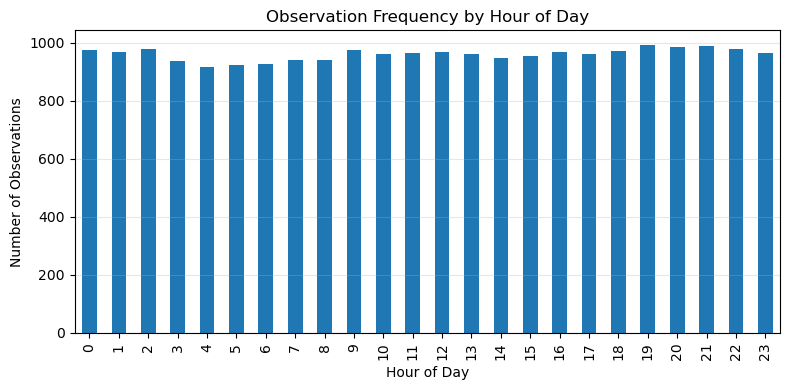

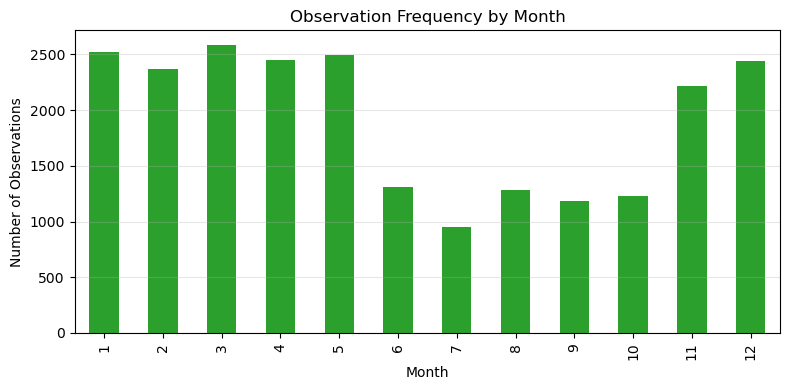

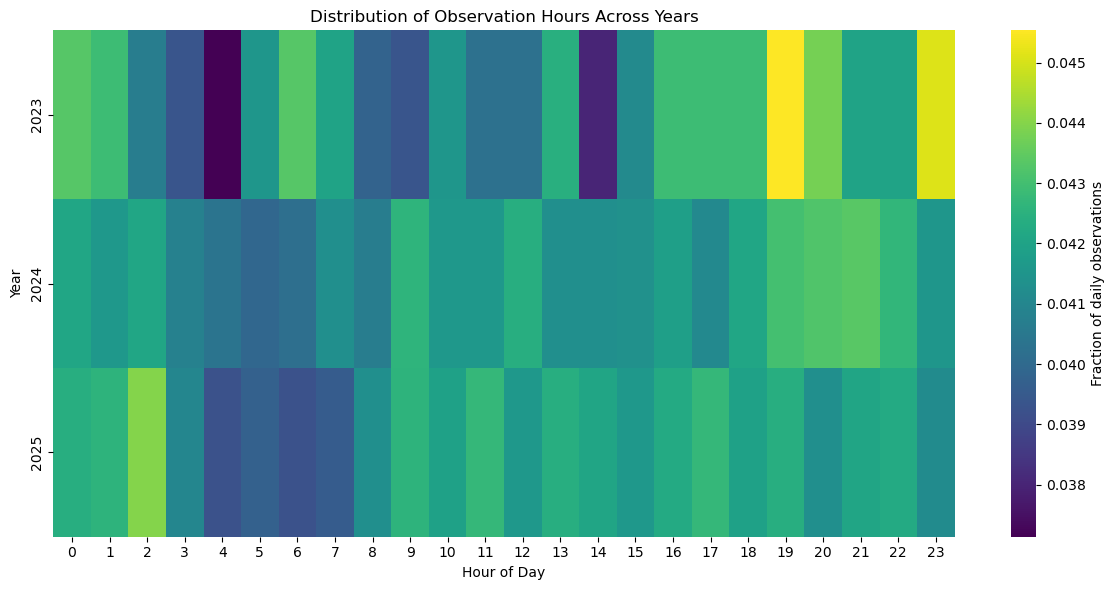

In [8]:
# count observations per hour
hourly_counts = tanikon_lag["hour"].value_counts().sort_index()

# plot
plt.figure(figsize=(8,4))
hourly_counts.plot(kind="bar")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Observations")
plt.title("Observation Frequency by Hour of Day")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# count per month
monthly_counts = tanikon_lag["month"].value_counts().sort_index()

# plot
plt.figure(figsize=(8,4))
monthly_counts.plot(kind="bar", color="tab:green")
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.title("Observation Frequency by Month")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# group by year × hour
hour_year_counts = (
    tanikon_lag.groupby(["year", "hour"])
    .size()
    .unstack(fill_value=0)
)

# normalize by total per year (to compare proportions)
hour_year_norm = hour_year_counts.div(hour_year_counts.sum(axis=1), axis=0)

# plot as heatmap
plt.figure(figsize=(12,6))
sns.heatmap(hour_year_norm, cmap="viridis", cbar_kws={"label": "Fraction of daily observations"})
plt.xlabel("Hour of Day")
plt.ylabel("Year")
plt.title("Distribution of Observation Hours Across Years")
plt.tight_layout()
plt.show()



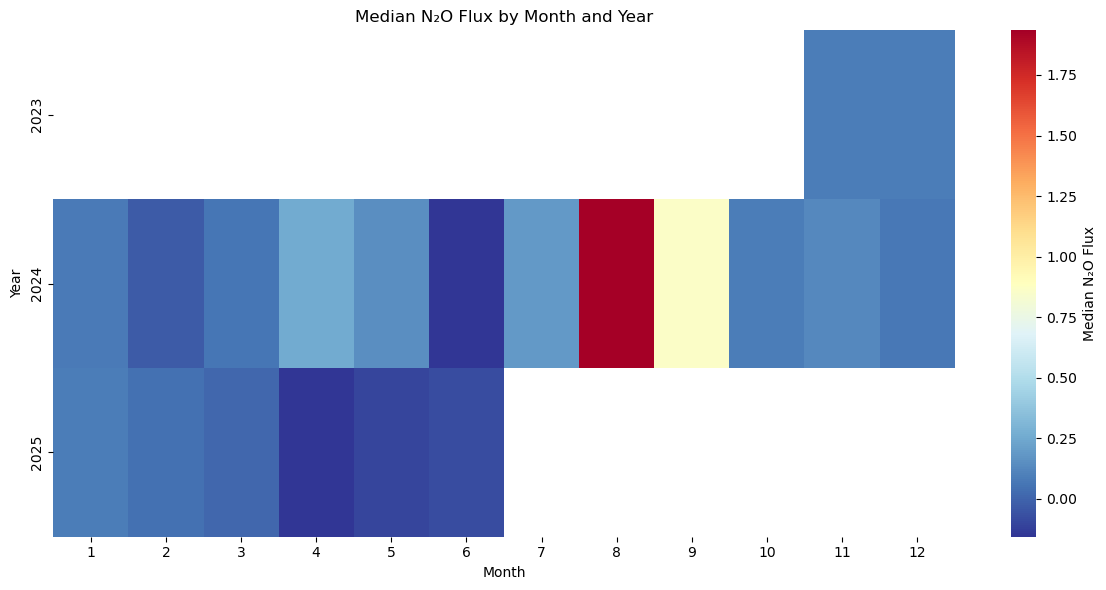

/tmp/ipykernel_73017/3799957677.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tanikon_lag.groupby(["T4_bin", "T15_bin"])["N2O_Flux"]


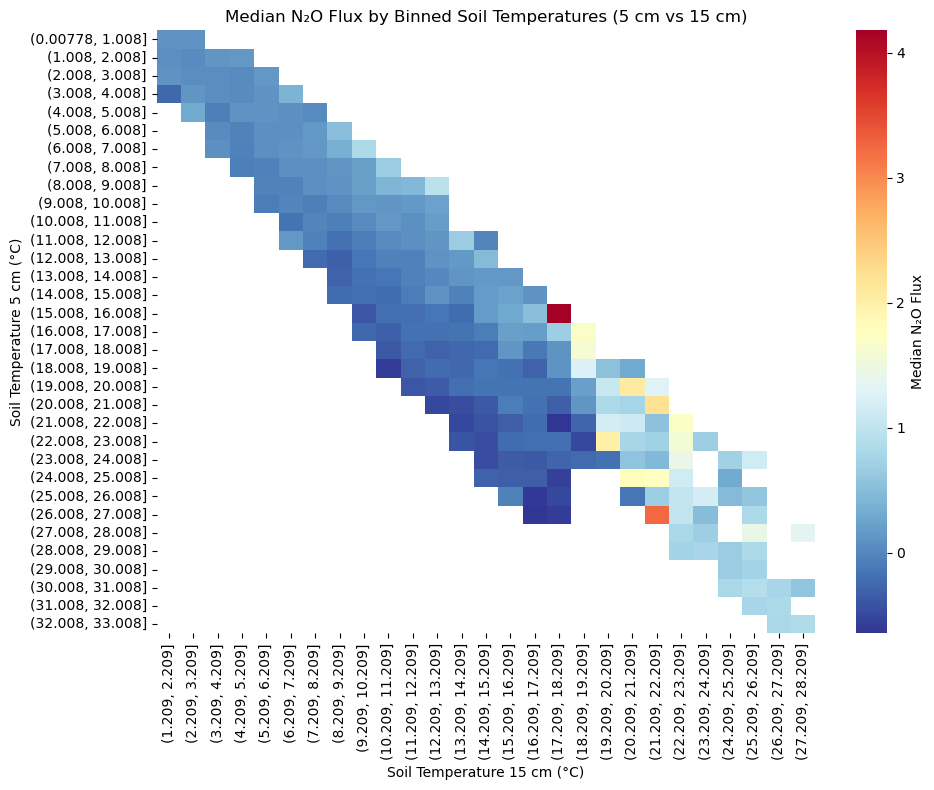

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# compute median N₂O flux per year × hour
median_flux = (
    tanikon_lag.groupby(["year", "month"])["N2O_Flux"]
    .median()
    .unstack(fill_value=np.nan)
)

# plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    median_flux,
    cmap="RdYlBu_r",
    cbar_kws={"label": "Median N₂O Flux"},
)
plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Median N₂O Flux by Month and Year")
plt.tight_layout()
plt.show()

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# define bin edges for both temperatures
bins_5cm = np.arange(tanikon_lag["SoilTemp_5cm"].min(), tanikon_lag["SoilTemp_5cm"].max()+1, 1)
bins_15cm = np.arange(tanikon_lag["SoilTemp_15cm"].min(), tanikon_lag["SoilTemp_15cm"].max()+1, 1)

# create binned categories
tanikon_lag["T4_bin"] = pd.cut(tanikon_lag["SoilTemp_5cm"], bins=bins_5cm)
tanikon_lag["T15_bin"] = pd.cut(tanikon_lag["SoilTemp_15cm"], bins=bins_15cm)

# compute median flux per 2D bin
median_flux_binned = (
    tanikon_lag.groupby(["T4_bin", "T15_bin"])["N2O_Flux"]
    .median()
    .unstack(fill_value=np.nan)
)

# plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    median_flux_binned,
    cmap="RdYlBu_r",
    cbar_kws={"label": "Median N₂O Flux"},
)
plt.xlabel("Soil Temperature 15 cm (°C)")
plt.ylabel("Soil Temperature 5 cm (°C)")
plt.title("Median N₂O Flux by Binned Soil Temperatures (5 cm vs 15 cm)")
plt.tight_layout()
plt.show()

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def plot_time_series(df, vars_to_plot):
    """
    Plot time series of selected variables with real time gaps shown on the x-axis.
    Automatically formats time labels and adds axis labels.
    """
    df = df.copy().sort_index()

    # --- Ensure datetime index ---
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # --- Layout ---
    n_cols = 3
    n_rows = int(len(vars_to_plot) / n_cols) + (len(vars_to_plot) % n_cols > 0)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12), sharex=True)
    axes = axes.flatten()

    # --- Plot each variable ---
    for i, var in enumerate(vars_to_plot):
        ax = axes[i]
        ax.plot(df.index, df[var], lw=1)
        ax.set_title(var, fontsize=10)
        ax.set_ylabel(var)
        ax.grid(True, alpha=0.3)

        # Format the x-axis as dates
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
        ax.tick_params(axis='x', rotation=45)

    # --- Remove unused axes if any ---
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # --- Common labels and formatting ---
    fig.suptitle("Time Series", fontsize=14)
    fig.text(0.5, 0.04, "Date", ha='center', fontsize=12)
    fig.tight_layout(rect=[0, 0.05, 1, 0.97])
    plt.show()


Raw Data


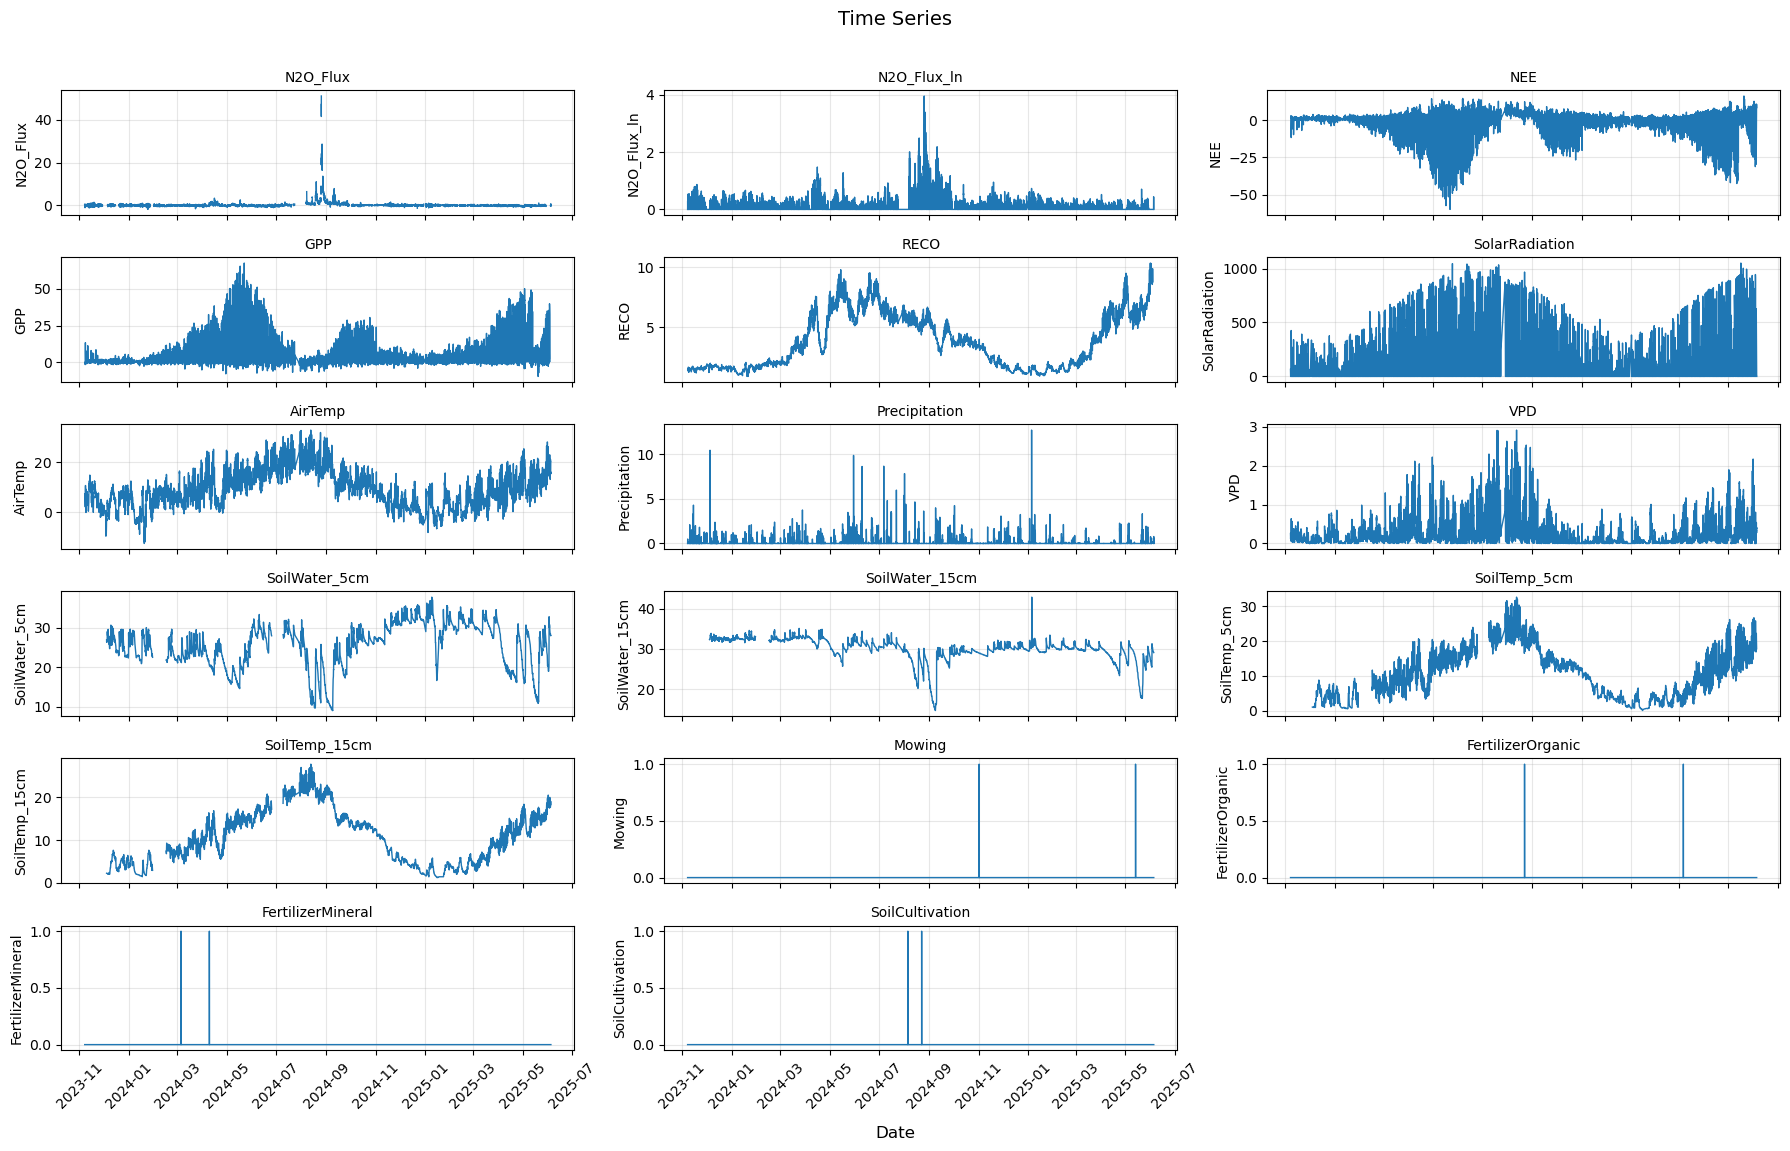

Daily Freq


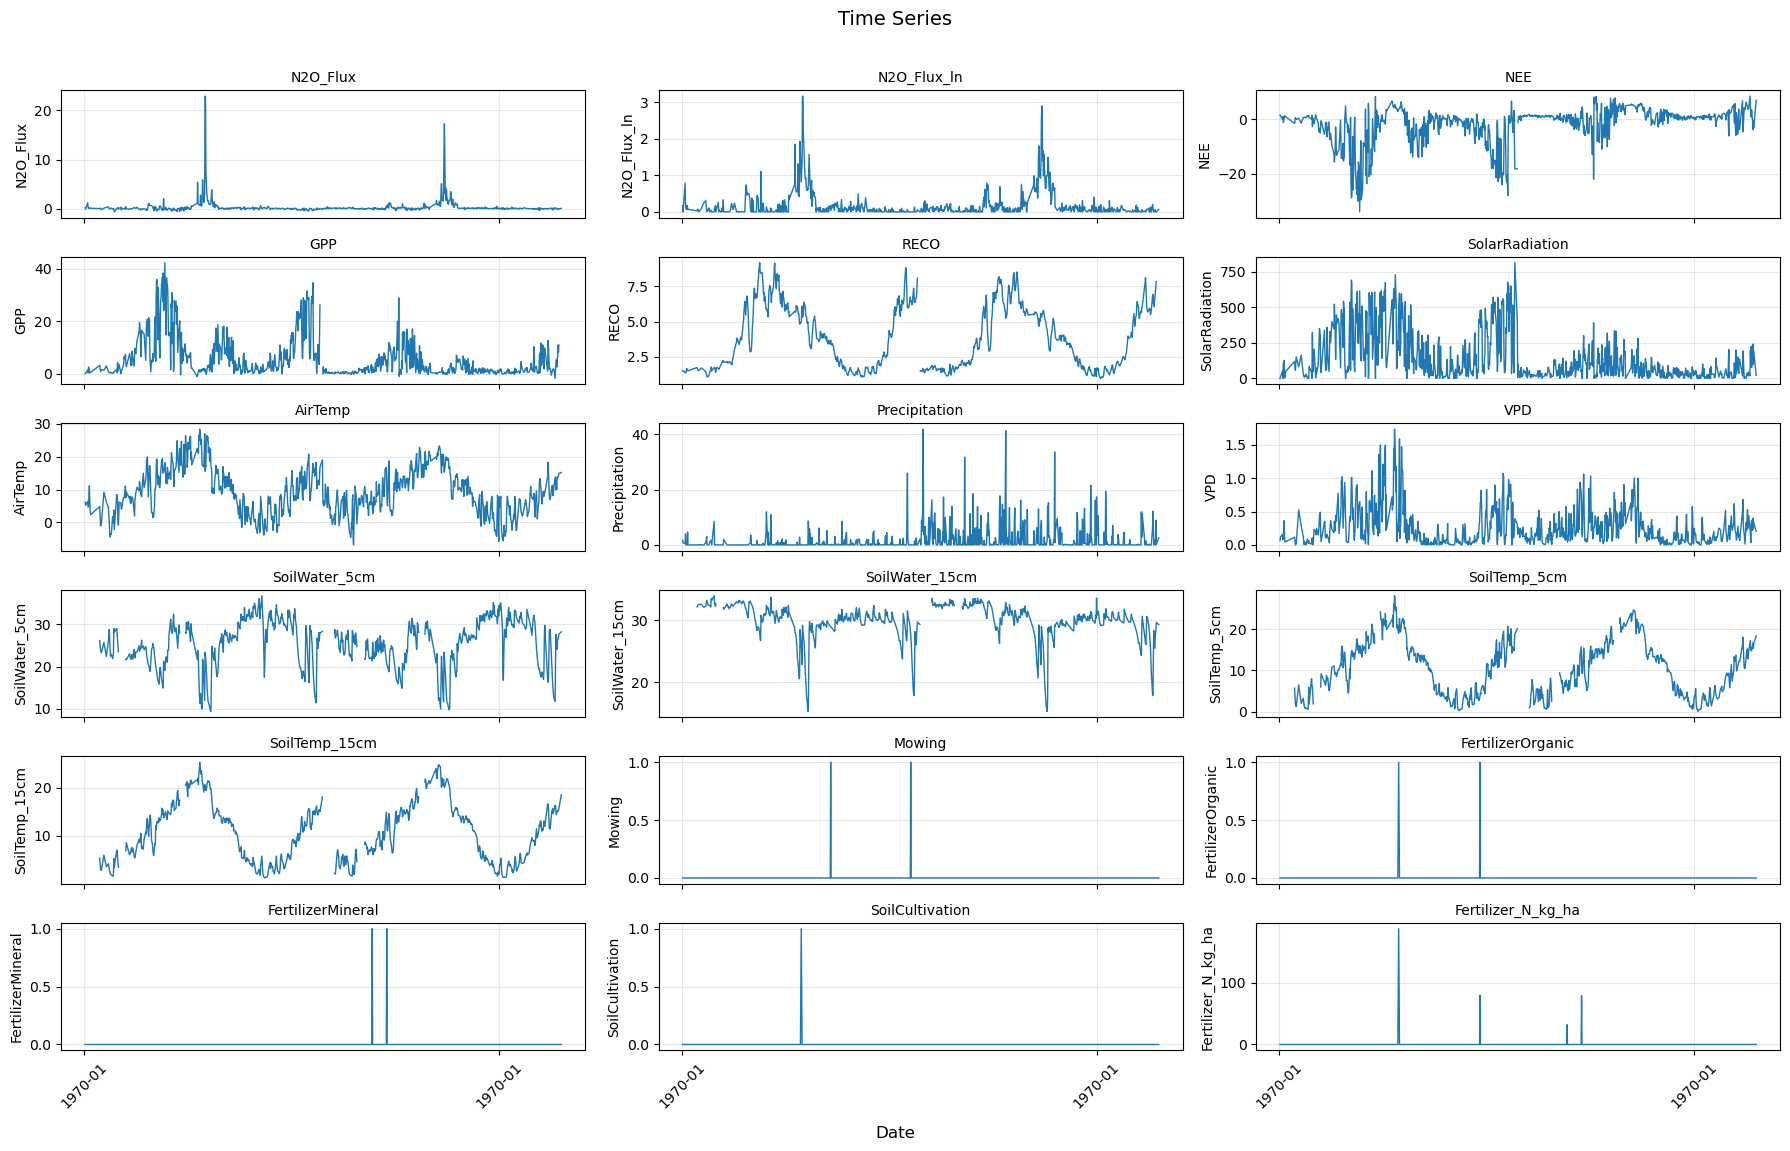

In [11]:
vars_to_plot = [
    "N2O_Flux", "N2O_Flux_ln", "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation",
    "VPD", "SoilWater_5cm", "SoilWater_15cm",
    "SoilTemp_5cm", "SoilTemp_15cm",
    "Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation",
]

vars_to_plot_w_fert = [
    "N2O_Flux", "N2O_Flux_ln", "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation",
    "VPD", "SoilWater_5cm", "SoilWater_15cm",
    "SoilTemp_5cm", "SoilTemp_15cm",
    "Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation",
    "Fertilizer_N_kg_ha"
]

# Daily averages
print("Raw Data")
plot_time_series(tanikon_lag, vars_to_plot)
print("Daily Freq")
plot_time_series(tanikon_daily, vars_to_plot_w_fert)

Found 4 fertilization events:


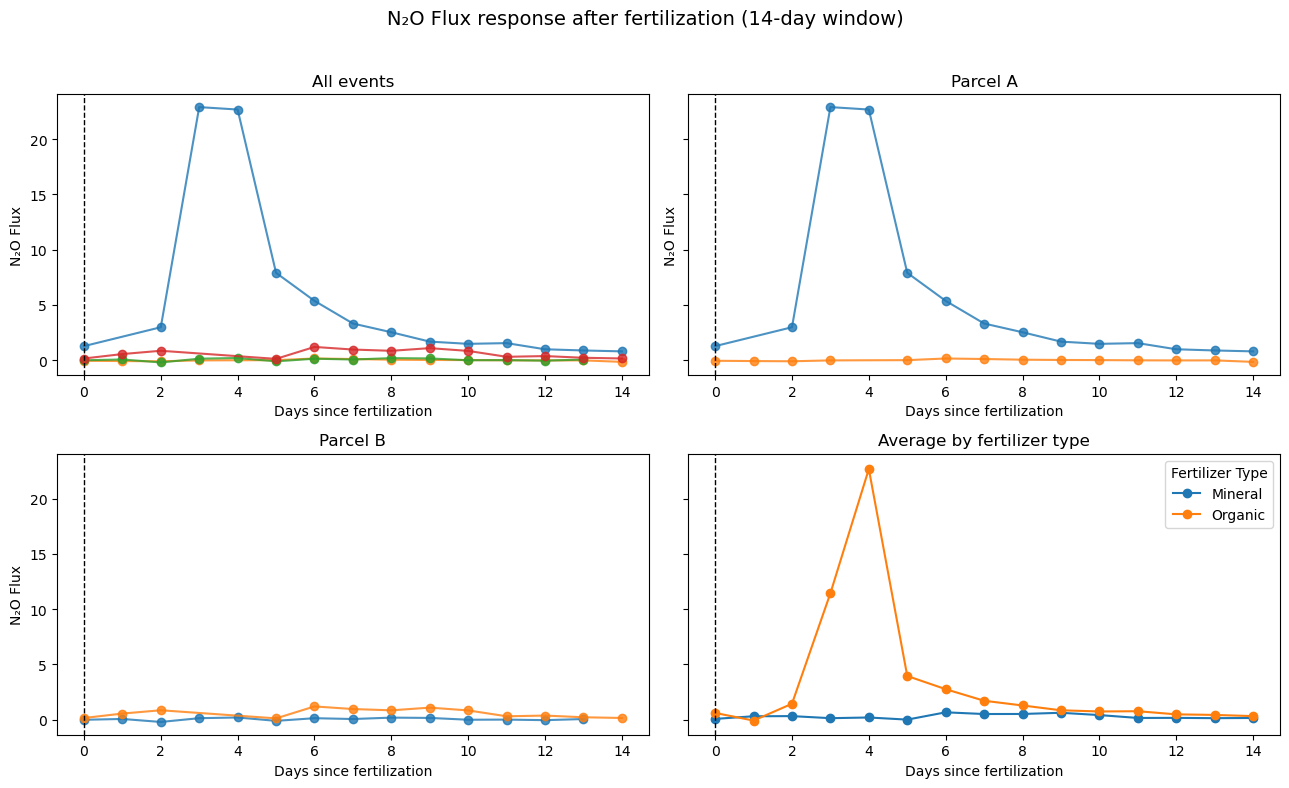

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Identify fertilization events ---
fert_events = tanikon_daily[
    (tanikon_daily["FertilizerOrganic"] == 1) |
    (tanikon_daily["FertilizerMineral"] == 1)
].copy()

tanikon_daily["Date"] = pd.to_datetime(tanikon_daily["Date"], errors="coerce")
print(f"Found {len(fert_events)} fertilization events:")

# --- Extract N₂O fluxes for 14 days after each event (same parcel) ---
window_days = 14
records = []

for _, event in fert_events.iterrows():
    parcel = event["Parcel"]
    event_date = pd.to_datetime(event["Date"])
    subset = tanikon_daily[
        (tanikon_daily["Parcel"] == parcel) &
        (tanikon_daily["Date"] >= event_date) &
        (tanikon_daily["Date"] <= event_date + pd.Timedelta(days=window_days))
    ].copy()
    
    subset["days_since_fert"] = (subset["Date"] - event_date).dt.days
    subset["event_date"] = event_date
    subset["parcel"] = parcel
    subset["fert_type"] = (
        "Organic" if event["FertilizerOrganic"] == 1 else "Mineral"
    )
    records.append(subset)

fert_windows = pd.concat(records, ignore_index=True)

# --- Plot setup (2x2 grid) ---
fig, axes = plt.subplots(2, 2, figsize=(13, 8), sharey=True)
fig.suptitle("N₂O Flux response after fertilization (14-day window)", fontsize=14)

# Helper function to plot multiple events
def plot_events(ax, df, title):
    for (parcel, event_date), group in df.groupby(["parcel", "event_date"]):
        ax.plot(group["days_since_fert"], group["N2O_Flux"], marker="o", alpha=0.8)
    ax.axvline(0, color="black", linestyle="--", linewidth=1)
    ax.set_title(title)
    ax.set_xlabel("Days since fertilization")
    ax.set_ylabel("N₂O Flux")

# --- Generate each panel ---
# (a) All events
plot_events(axes[0, 0], fert_windows, "All events")

# (b) Parcel A
plot_events(axes[0, 1], fert_windows[fert_windows["parcel"] == "A"], "Parcel A")

# (c) Parcel B
plot_events(axes[1, 0], fert_windows[fert_windows["parcel"] == "B"], "Parcel B")

# (d) Organic vs Mineral
for fert_type, group in fert_windows.groupby("fert_type"):
    mean_curve = group.groupby("days_since_fert")["N2O_Flux"].mean()
    axes[1, 1].plot(mean_curve.index, mean_curve.values, marker="o", label=fert_type)
axes[1, 1].axvline(0, color="black", linestyle="--", linewidth=1)
axes[1, 1].set_title("Average by fertilizer type")
axes[1, 1].set_xlabel("Days since fertilization")
axes[1, 1].legend(title="Fertilizer Type")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


/tmp/ipykernel_73017/2108694047.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.07, 1, 0.96])


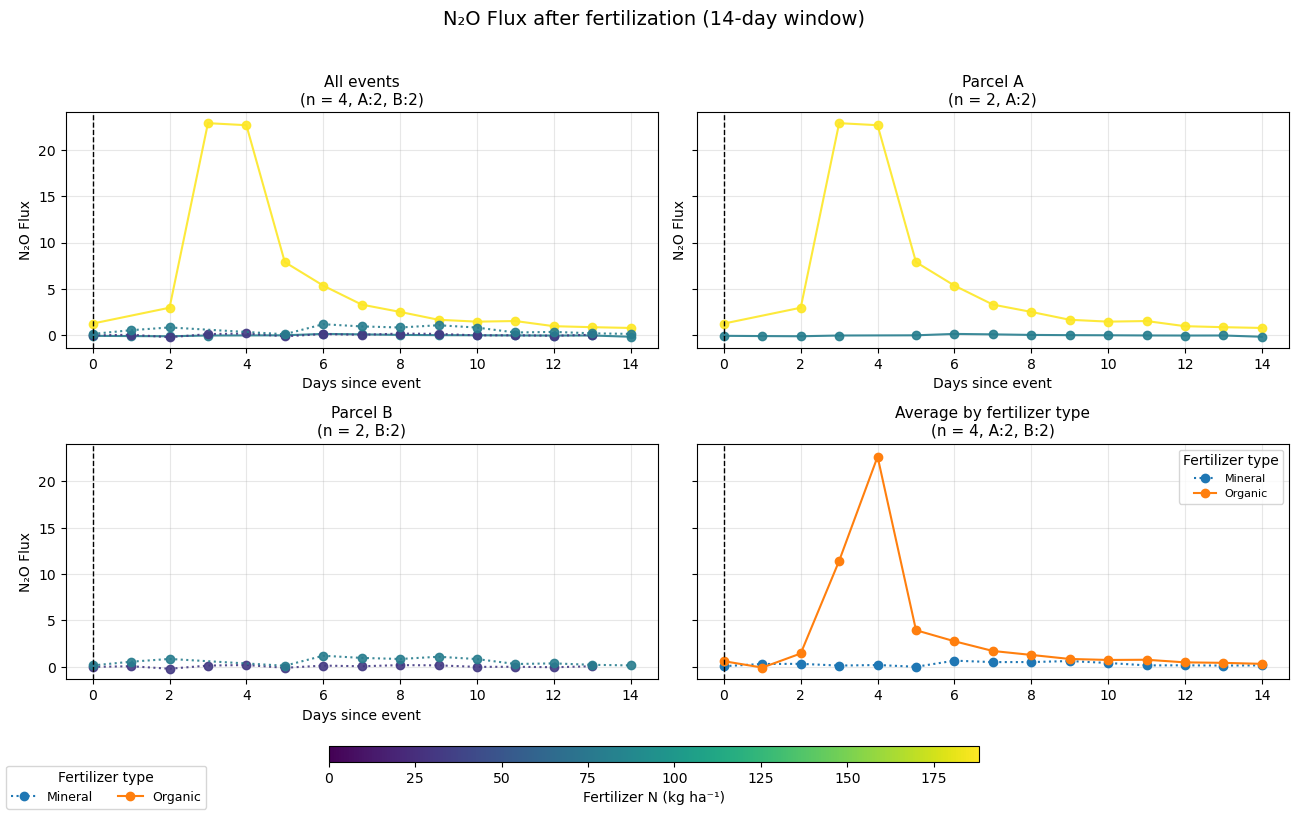

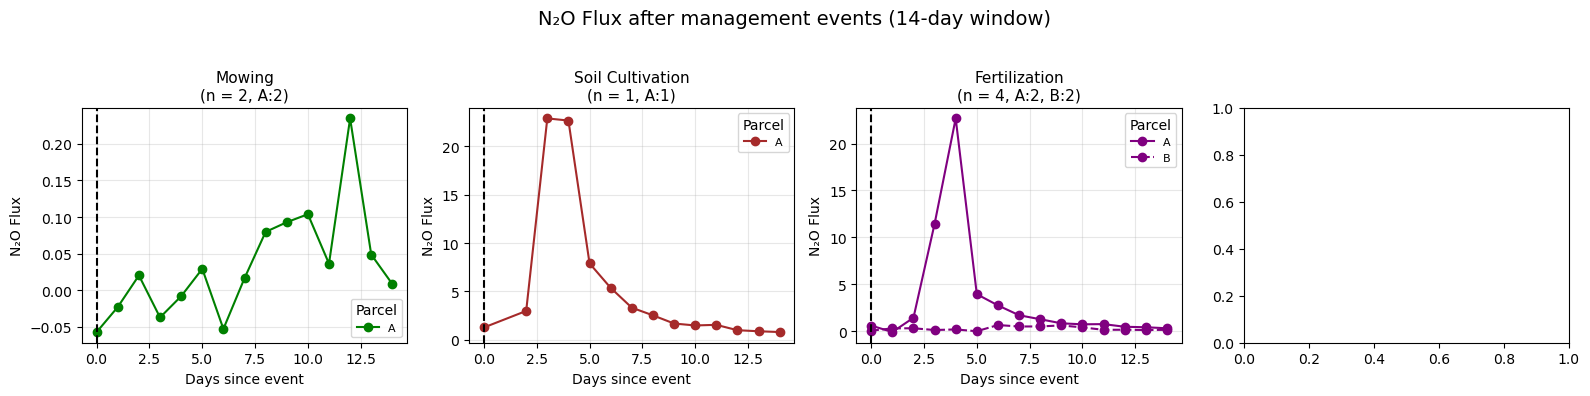

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

# ==========================================================
# 1️⃣ Helper: extract N₂O flux windows after each management event
# ==========================================================
def extract_event_windows(df_daily, event_col, window_days=14):
    """
    Extract N₂O flux time windows following a management event.

    Args:
        df_daily : daily dataframe (must include Date, Parcel, N2O_Flux, event_col)
        event_col : column name for event (e.g., "Mowing")
        window_days : number of days after event to include
    """
    records = []
    events = df_daily[df_daily[event_col] == 1].copy()
    if events.empty:
        return pd.DataFrame()

    for _, event in events.iterrows():
        parcel = event["Parcel"]
        event_date = pd.to_datetime(event["Date"])
        subset = df_daily[
            (df_daily["Parcel"] == parcel) &
            (df_daily["Date"] >= event_date) &
            (df_daily["Date"] <= event_date + pd.Timedelta(days=window_days))
        ].copy()

        subset["days_since_event"] = (subset["Date"] - event_date).dt.days
        subset["event_date"] = event_date
        subset["parcel"] = parcel
        subset["event_type"] = event_col  # keep event label
        records.append(subset)

    return pd.concat(records, ignore_index=True)


# ==========================================================
# 2️⃣ Create windows for each management type
# ==========================================================
mow_windows   = extract_event_windows(tanikon_daily, "Mowing")
cult_windows  = extract_event_windows(tanikon_daily, "SoilCultivation")
fert_windows  = extract_event_windows(tanikon_daily, "FertilizerOrganic")
fert_windowsM = extract_event_windows(tanikon_daily, "FertilizerMineral")

# merge organic + mineral
fert_windows["event_type"] = "Organic"
fert_windowsM["event_type"] = "Mineral"
fert_windows = pd.concat([fert_windows, fert_windowsM], ignore_index=True)

# Add fertilizer amount (if available)
if "Fertilizer_N_kg_ha" not in fert_windows.columns:
    fert_windows["Fertilizer_N_kg_ha"] = 0.0

# ==========================================================
# 3️⃣ Fertilization plots
# ==========================================================
fig, axes = plt.subplots(2, 2, figsize=(13, 8), sharey=True)
fig.suptitle("N₂O Flux after fertilization (14-day window)", fontsize=14)

# normalize fertilizer N for color mapping
norm = mcolors.Normalize(
    vmin=fert_windows["Fertilizer_N_kg_ha"].min(),
    vmax=fert_windows["Fertilizer_N_kg_ha"].max()
)
cmap = cm.viridis


def plot_fert_events(ax, df, title):
    if df.empty:
        ax.set_title(f"{title}\n(no events)", fontsize=10)
        return

    n_total = df["event_date"].nunique()
    n_by_field = df.groupby("parcel")["event_date"].nunique().to_dict()

    for _, group in df.groupby(["parcel", "event_date"]):
        n_val = group["Fertilizer_N_kg_ha"].iloc[0]
        fert_type = group["event_type"].iloc[0]
        color = cmap(norm(n_val))
        linestyle = "-" if "Organic" in fert_type else ":"
        ax.plot(
            group["days_since_event"], group["N2O_Flux"],
            color=color, linestyle=linestyle, marker="o", alpha=0.9
        )

    ax.axvline(0, color="black", linestyle="--", linewidth=1)
    n_text = ", ".join([f"{p}:{n}" for p, n in n_by_field.items()])
    ax.set_title(f"{title}\n(n = {n_total}, {n_text})", fontsize=11)
    ax.set_xlabel("Days since event")
    ax.set_ylabel("N₂O Flux")
    ax.grid(True, alpha=0.3)


# (a) All events
plot_fert_events(axes[0, 0], fert_windows, "All events")

# (b) Parcel A
plot_fert_events(axes[0, 1], fert_windows[fert_windows["parcel"] == "A"], "Parcel A")

# (c) Parcel B
plot_fert_events(axes[1, 0], fert_windows[fert_windows["parcel"] == "B"], "Parcel B")

# (d) Average by fertilizer type
ax = axes[1, 1]
for event_type, group in fert_windows.groupby("event_type"):
    mean_curve = group.groupby("days_since_event")["N2O_Flux"].mean()
    linestyle = "-" if "Organic" in event_type else ":"
    ax.plot(mean_curve.index, mean_curve.values,
            marker="o", label=event_type, linestyle=linestyle)
n_total = fert_windows["event_date"].nunique()
n_by_field = fert_windows.groupby("parcel")["event_date"].nunique().to_dict()
n_text = ", ".join([f"{p}:{n}" for p, n in n_by_field.items()])
ax.axvline(0, color="black", linestyle="--", linewidth=1)
ax.set_title(f"Average by fertilizer type\n(n = {n_total}, {n_text})", fontsize=11)
ax.legend(title="Fertilizer type", fontsize=8)
ax.grid(True, alpha=0.3)

# legend + colorbar
handles, labels = axes[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower left", ncol=2,
           fontsize=9, title="Fertilizer type", title_fontsize=10)
cbar_ax = fig.add_axes([0.25, 0.04, 0.5, 0.02])
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Fertilizer N (kg ha⁻¹)")

plt.tight_layout(rect=[0, 0.07, 1, 0.96])
plt.show()

# ==========================================================
# 4️⃣ Management event plots
# ==========================================================
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=False)
fig.suptitle("N₂O Flux after management events (14-day window)", fontsize=14)

management_panels = [
    (mow_windows, "Mowing", "green"),
    (cult_windows, "Soil Cultivation", "brown"),
    (fert_windows, "Fertilization", "purple")
]

for ax, (df, label, color) in zip(axes, management_panels):
    if df.empty:
        ax.set_title(f"{label}\n(no events)", fontsize=10)
        continue

    n_total = df["event_date"].nunique()
    n_by_field = df.groupby("parcel")["event_date"].nunique().to_dict()
    n_text = ", ".join([f"{p}:{n}" for p, n in n_by_field.items()])

    for parcel in df["parcel"].unique():
        mean_curve = (
            df[df["parcel"] == parcel]
            .groupby("days_since_event")["N2O_Flux"]
            .mean()
        )
        ax.plot(
            mean_curve.index, mean_curve.values,
            marker="o", label=f"{parcel}",
            color=color, linestyle="-" if parcel == "A" else "--"
        )

    ax.axvline(0, color="black", linestyle="--")
    ax.set_title(f"{label}\n(n = {n_total}, {n_text})", fontsize=11)
    ax.set_xlabel("Days since event")
    ax.set_ylabel("N₂O Flux")
    ax.legend(title="Parcel", fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


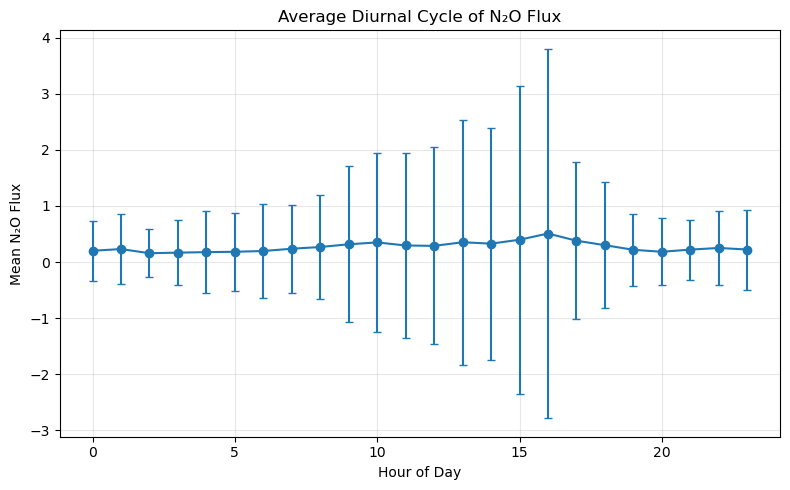

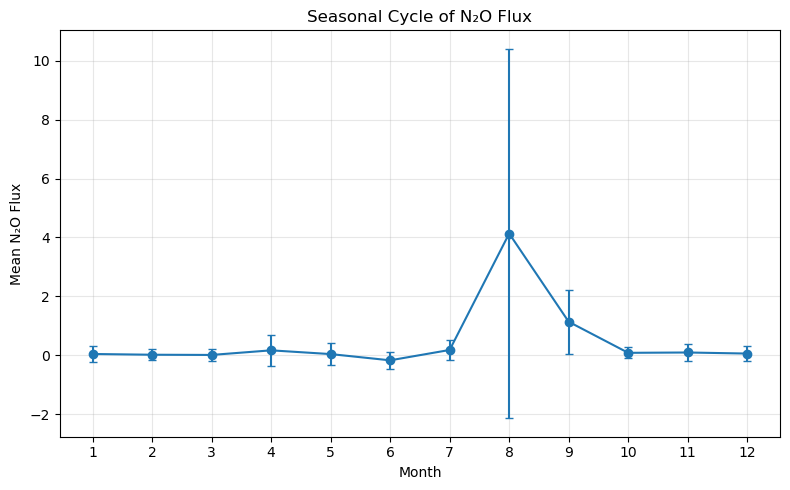

In [14]:
hourly_mean = tanikon_lag.groupby("hour")["N2O_Flux"].mean()
hourly_std  = tanikon_lag.groupby("hour")["N2O_Flux"].std()

plt.figure(figsize=(8, 5))
plt.errorbar(hourly_mean.index, hourly_mean, yerr=hourly_std, fmt="-o", capsize=3)
plt.xlabel("Hour of Day")
plt.ylabel("Mean N₂O Flux")
plt.title("Average Diurnal Cycle of N₂O Flux")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

monthly_mean = tanikon_lag.groupby("month")["N2O_Flux"].mean()
monthly_std  = tanikon_lag.groupby("month")["N2O_Flux"].std()

plt.figure(figsize=(8, 5))
plt.errorbar(monthly_mean.index, monthly_mean, yerr=monthly_std, fmt="-o", capsize=3)
plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Mean N₂O Flux")
plt.title("Seasonal Cycle of N₂O Flux")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



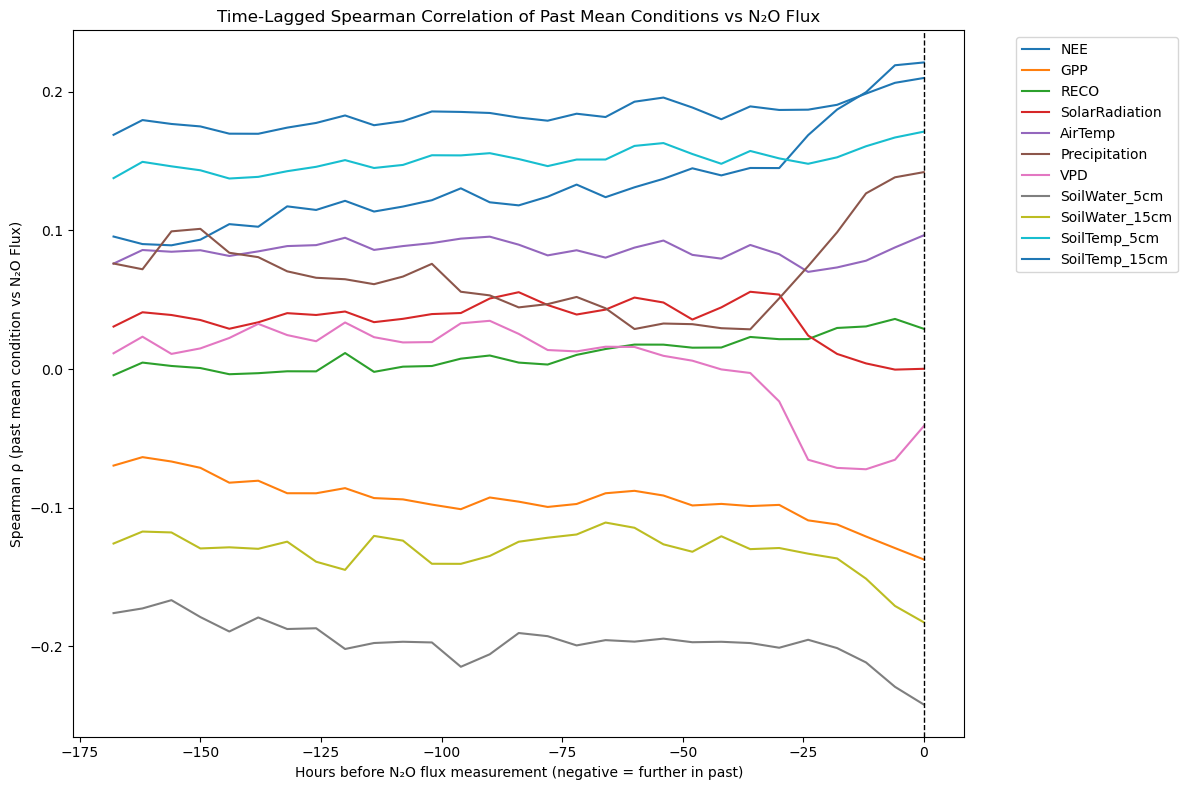

In [15]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Base setup ---
tanikon_time_index = tanikon_lag.copy()

predictors = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm",
    "SoilTemp_5cm", "SoilTemp_15cm",
]

target = "N2O_Flux"

# --- Parameters ---
window_hours = 24        # window size for averaging (past 24h)
step_hours   = 6        # step between lags
max_hours    = 7 * 24    # look back 1 week (you can extend to 5 weeks)
offsets      = range(0, -max_hours - step_hours, -step_hours)  # only past (0, -24, -48, ...)

# --- Rolling mean of predictors (24h backward window) ---
window = f"{window_hours}h"
rolling_means = tanikon_time_index[predictors].rolling(window=window, closed="left").mean()

# --- Compute lag correlations (Spearman) ---
lag_corrs = {}

for var in predictors:
    corrs = []
    for offset in offsets:
        shifted = rolling_means[var].shift(freq=pd.Timedelta(hours=offset))
        aligned = tanikon_time_index[[target]].join(shifted.rename("past_mean")).dropna()
        if len(aligned) > 2:
            rho, _ = spearmanr(aligned[target], aligned["past_mean"])
            corrs.append(rho)
        else:
            corrs.append(np.nan)
    lag_corrs[var] = (list(offsets), corrs)

# --- Plot results ---
plt.figure(figsize=(12, 8))
for var, (offsets, corrs) in lag_corrs.items():
    plt.plot(offsets, corrs, label=var)

plt.axvline(0, color="k", linestyle="--", lw=1)
plt.xlabel("Hours before N₂O flux measurement (negative = further in past)")
plt.ylabel("Spearman ρ (past mean condition vs N₂O Flux)")
plt.title("Time-Lagged Spearman Correlation of Past Mean Conditions vs N₂O Flux")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [16]:
def cross_correlation_per_parcel(df, predictor_vars, target="N2O_Flux", max_lag=60):
    df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        if "Date" in df.columns:
            df["Date"] = pd.to_datetime(df["Date"])
            df = df.set_index("Date")
        else:
            raise ValueError("DataFrame must have a DatetimeIndex or 'Date' column")

    df = df[df[target] >= 0].dropna(subset=[target])
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    predictor_vars = [v for v in predictor_vars if v in numeric_cols]
    lags = np.arange(-max_lag, max_lag + 1)
    parcels = df["Parcel"].unique()
    results_dict = {}

    fig, axes = plt.subplots(1, len(parcels), figsize=(14, 5), sharey=True)
    if len(parcels) == 1:
        axes = [axes]

    for ax, parcel in zip(axes, parcels):
        sub = df[df["Parcel"] == parcel].copy().sort_index()
        corrs_dict = {}

        for var in predictor_vars:
            corrs = []
            for lag in lags:
                shifted = sub[var].shift(freq=pd.to_timedelta(lag, unit="D"))
                aligned = pd.concat([sub[target], shifted], axis=1, join="inner").dropna()
                rho = np.nan if aligned.empty else spearmanr(aligned[target], aligned[var])[0]
                corrs.append(rho)
            corrs_dict[var] = corrs

        for var, corrs in corrs_dict.items():
            ax.plot(lags, corrs, lw=1.2, label=var)

        ax.axhline(0, color="gray", lw=1)
        ax.axvline(0, color="gray", lw=1, ls="--")
        ax.set_xlabel("Lag (days)")
        ax.set_title(f"Parcel {parcel}")
        ax.grid(True, alpha=0.3)
        results_dict[parcel] = corrs_dict

    axes[0].set_ylabel("Spearman ρ")
    fig.suptitle("Cross-correlation between predictors and N₂O flux (per parcel)", fontsize=13)
    fig.legend(predictor_vars, loc="upper center", ncol=3, fontsize=9)
    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.show()

    # --- Summary ---
    summary_rows = []
    for parcel in parcels:
        for var, corrs in results_dict[parcel].items():
            best_idx = np.nanargmax(np.abs(corrs))
            summary_rows.append({
                "Parcel": parcel,
                "Variable": var,
                "Best lag (days)": int(lags[best_idx]),
                "Max corr (ρ)": corrs[best_idx],
            })

    summary_df = pd.DataFrame(summary_rows)
    summary_df = (
        summary_df
        .sort_values(
            by=["Parcel", "Max corr (ρ)"],
            ascending=[True, False],
            key=lambda col: np.abs(col) if col.name == "Max corr (ρ)" else col
        )
        .round(3)
    )

    return summary_df

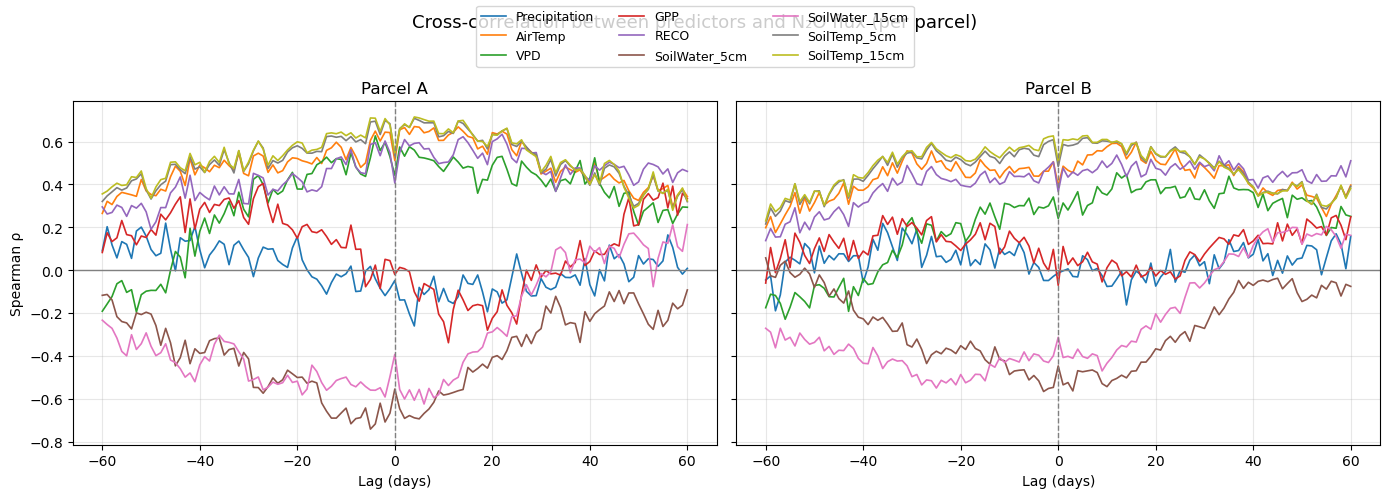

   Parcel        Variable  Best lag (days)  Max corr (ρ)
5       A   SoilWater_5cm               -5        -0.740
8       A   SoilTemp_15cm                4         0.715
7       A    SoilTemp_5cm                4         0.708
1       A         AirTemp                4         0.670
4       A            RECO               22         0.634
2       A             VPD               -4         0.626
6       A  SoilWater_15cm                6        -0.623
3       A             GPP               55         0.406
0       A   Precipitation                4        -0.260
17      B   SoilTemp_15cm                6         0.628
16      B    SoilTemp_5cm                6         0.618
10      B         AirTemp               16         0.597
14      B   SoilWater_5cm               -3        -0.565
15      B  SoilWater_15cm              -25        -0.549
13      B            RECO               12         0.537
11      B             VPD               12         0.454
12      B             GPP      

In [18]:
predictors = [
    "Precipitation", "AirTemp", "VPD", "GPP", "RECO",
    "SoilWater_5cm", "SoilWater_15cm", "SoilTemp_5cm", "SoilTemp_15cm"
]

summary = cross_correlation_per_parcel(tanikon_daily, predictor_vars=predictors, max_lag=60)
print(summary)


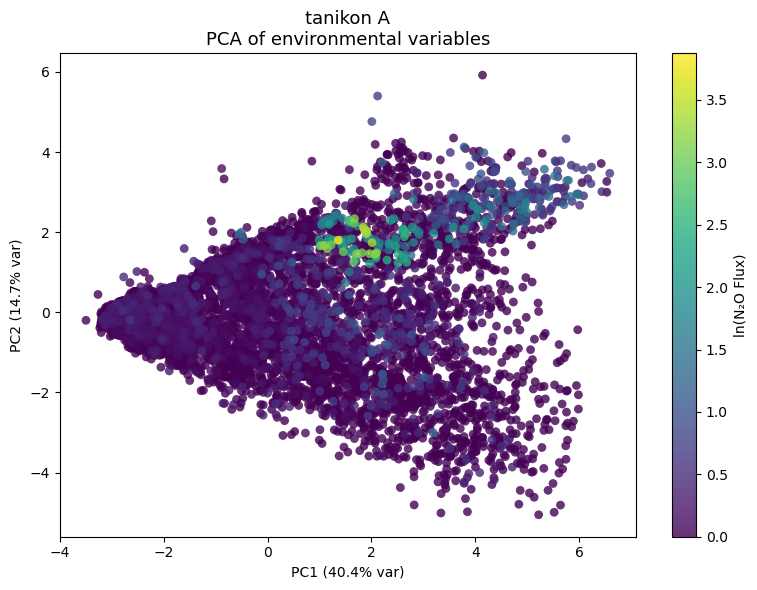

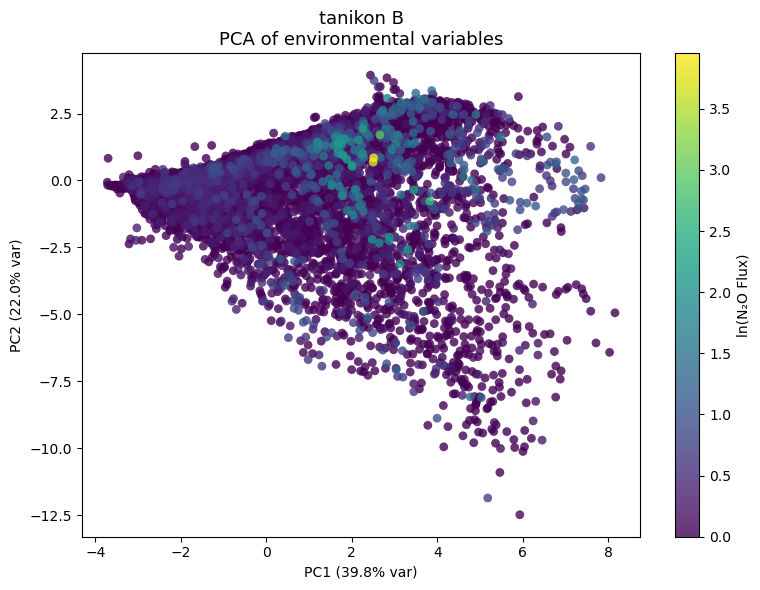

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm",
    "SoilTemp_5cm", "SoilTemp_15cm",
    "NEE", "GPP", "RECO",
    "Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation"
]

def plot_pca(df, title):
    # Drop rows with missing values in required columns
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()
    
    # Standardize variables
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])
    
    # Run PCA
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(X_scaled)
    df_clean["PC1"] = pcs[:, 0]
    df_clean["PC2"] = pcs[:, 1]

    # Sort by N2O_Flux (so larger appear on top)
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["PC1"], df_clean["PC2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    # Labels and aesthetics
    ax.set_title(f"{title}\nPCA of environmental variables", fontsize=13)
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for tanikon_A and tanikon_B
# =============================================
plot_pca(tanikon_A, "tanikon A")
plot_pca(tanikon_B, "tanikon B")

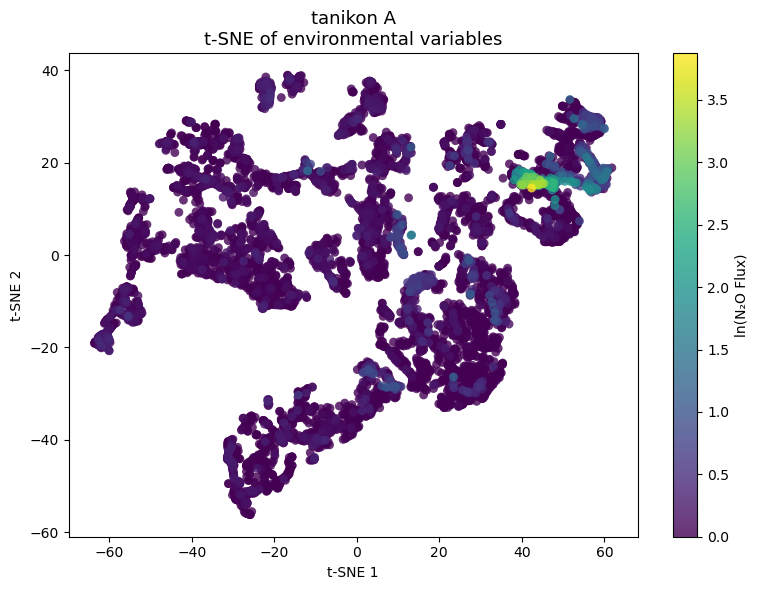

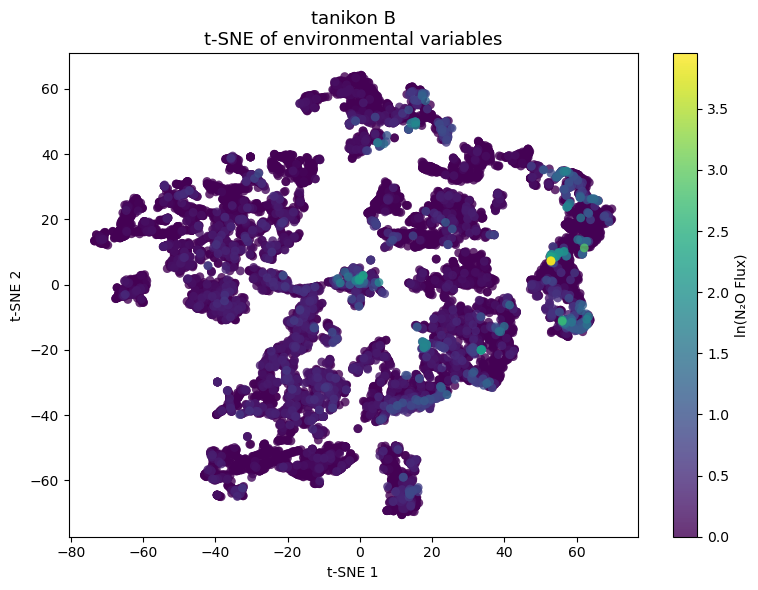

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm",
    "SoilTemp_5cm", "SoilTemp_15cm",
    "NEE", "GPP", "RECO",
    "Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation"
]

def plot_tsne(df, title, perplexity=100, learning_rate=200, random_state=42):
    # Drop missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()

    # Standardize features
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run t-SNE
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        learning_rate=learning_rate,
        init="pca",
        random_state=random_state
    )
    tsne_results = tsne.fit_transform(X_scaled)

    df_clean["tSNE1"] = tsne_results[:, 0]
    df_clean["tSNE2"] = tsne_results[:, 1]

    # Sort by N2O_Flux for plotting order
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["tSNE1"], df_clean["tSNE2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    ax.set_title(f"{title}\nt-SNE of environmental variables", fontsize=13)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for tanikon_A and tanikon_B
# =============================================
plot_tsne(tanikon_A, "tanikon A")
plot_tsne(tanikon_B, "tanikon B")

In [23]:
tanikon_daily.columns

Index(['Date', 'Parcel', 'N2O_Flux', 'NEE', 'GPP', 'RECO', 'SolarRadiation',
       'AirTemp', 'VPD', 'SoilWater_5cm', 'SoilWater_15cm', 'SoilWater_30cm',
       'SoilTemp_5cm', 'SoilTemp_15cm', 'SoilTemp_30cm', 'Precipitation',
       'Mowing', 'FertilizerOrganic', 'FertilizerMineral', 'SoilCultivation',
       'Sowing', 'DaysSince_Mowing', 'DaysSince_FertilizerOrganic',
       'DaysSince_FertilizerMineral', 'DaysSince_SoilCultivation',
       'DaysSince_Sowing', 'Fertilizer_N_kg_ha', 'NEE_lag1d', 'NEE_lag3d',
       'NEE_lag5d', 'NEE_lag7d', 'GPP_lag1d', 'GPP_lag3d', 'GPP_lag5d',
       'GPP_lag7d', 'RECO_lag1d', 'RECO_lag3d', 'RECO_lag5d', 'RECO_lag7d',
       'SolarRadiation_lag1d', 'SolarRadiation_lag3d', 'SolarRadiation_lag5d',
       'SolarRadiation_lag7d', 'AirTemp_lag1d', 'AirTemp_lag3d',
       'AirTemp_lag5d', 'AirTemp_lag7d', 'Precipitation_lag1d',
       'Precipitation_lag3d', 'Precipitation_lag5d', 'Precipitation_lag7d',
       'VPD_lag1d', 'VPD_lag3d', 'VPD_lag5d', 'VPD_

In [24]:
lag_vars = ['NEE', 'GPP', 'RECO', 'SolarRadiation',
       'AirTemp', 'VPD', 'SoilWater_5cm', 'SoilWater_15cm', 'SoilWater_30cm',
       'SoilTemp_5cm', 'SoilTemp_15cm', 'SoilTemp_30cm', 'Precipitation',
       'Mowing', 'FertilizerOrganic', 'FertilizerMineral', 'SoilCultivation',
       'Sowing', 'DaysSince_Mowing', 'DaysSince_FertilizerOrganic',
       'DaysSince_FertilizerMineral', 'DaysSince_SoilCultivation',
       'DaysSince_Sowing', 'Fertilizer_N_kg_ha', 'NEE_lag1d', 'NEE_lag3d',
       'NEE_lag5d', 'NEE_lag7d', 'GPP_lag1d', 'GPP_lag3d', 'GPP_lag5d',
       'GPP_lag7d', 'RECO_lag1d', 'RECO_lag3d', 'RECO_lag5d', 'RECO_lag7d',
       'SolarRadiation_lag1d', 'SolarRadiation_lag3d', 'SolarRadiation_lag5d',
       'SolarRadiation_lag7d', 'AirTemp_lag1d', 'AirTemp_lag3d',
       'AirTemp_lag5d', 'AirTemp_lag7d', 'Precipitation_lag1d',
       'Precipitation_lag3d', 'Precipitation_lag5d', 'Precipitation_lag7d',
       'VPD_lag1d', 'VPD_lag3d', 'VPD_lag5d', 'VPD_lag7d',
       'SoilWater_5cm_lag1d', 'SoilWater_5cm_lag3d', 'SoilWater_5cm_lag5d',
       'SoilWater_5cm_lag7d', 'SoilWater_15cm_lag1d', 'SoilWater_15cm_lag3d',
       'SoilWater_15cm_lag5d', 'SoilWater_15cm_lag7d', 'SoilWater_30cm_lag1d',
       'SoilWater_30cm_lag3d', 'SoilWater_30cm_lag5d', 'SoilWater_30cm_lag7d',
       'SoilTemp_5cm_lag1d', 'SoilTemp_5cm_lag3d', 'SoilTemp_5cm_lag5d',
       'SoilTemp_5cm_lag7d', 'SoilTemp_15cm_lag1d', 'SoilTemp_15cm_lag3d',
       'SoilTemp_15cm_lag5d', 'SoilTemp_15cm_lag7d', 'SoilTemp_30cm_lag1d',
       'SoilTemp_30cm_lag3d', 'SoilTemp_30cm_lag5d', 'SoilTemp_30cm_lag7d', 'month']